In [7]:
import numpy as np
import glob
import os
import struct
import matplotlib.pyplot as plt; plt.ion()
import matplotlib.patches as patches

In [2]:
FFT_LEN = 2048
f_s = 2000000
fft_bin = 564
# 172.05 MHz
f_c = 172500000
integral_len = int(np.floor(0.06 * f_s / FFT_LEN))


In [4]:
data_dir = "/media/ntlhui/FA56-CFCD/2017.08.19/RUN_000025/"
raw_files = sorted(glob.glob(os.path.join(data_dir, 'RAW_DATA_*')))

samples = []

In [5]:
raw_file = raw_files[7]
with open(raw_file, 'rb') as data_file:
    data = data_file.read()
for i in range(int(len(data) / 4)):
    tsample = struct.unpack('hh', data[i * 4:(i+1) * 4])
    sample = (tsample[0] + tsample[1] * 1j) / 1024
    samples.append(sample)
seq_samples = np.array(samples)
arr_samples = np.reshape(seq_samples[0:FFT_LEN*int(len(samples) / FFT_LEN)], (FFT_LEN, int(len(samples) / FFT_LEN)), order='F')
f_samp = np.fft.fft(arr_samples, axis=0) / FFT_LEN
waterfall = np.power(np.abs(np.fft.fftshift(f_samp, axes=0)), 2)

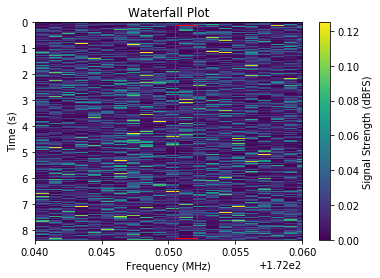

In [22]:
fig, ax = plt.subplots(1)
waterfall_extents = ((f_c - f_s / 2) / 1e6, (f_c + f_s / 2) / 1e6, len(seq_samples) / f_s, 0)
waterfall_plt = plt.imshow(waterfall.transpose(), aspect='auto', extent=waterfall_extents)
# waterfall_plt = plt.imshow(waterfall.transpose(), aspect='auto')
waterfall_cbr = plt.colorbar()
plt.ylabel('Time (s)')
plt.xlabel('Frequency (MHz)')
waterfall_cbr.set_label('Signal Strength (dBFS)')
plt.xlim(172.04, 172.06)
plt.clim(0, 0.125)
plt.title('Waterfall Plot')
rect = patches.Rectangle((172.0505, 0.1), 0.0016, 8.2, linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

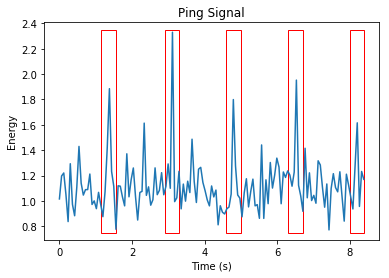

In [39]:
freq_isolate = waterfall[fft_bin,:]
freq_energy = np.zeros(int(len(freq_isolate) / integral_len))

for i in range(len(freq_energy)):
    freq_energy[i] = np.sum(freq_isolate[i * integral_len:(i + 1) * integral_len - 1])
t = np.arange(len(freq_energy)) / (len(freq_energy) - 1) * waterfall_extents[2]
fig1, ax = plt.subplots(1)
plt.plot(t, freq_energy)
plt.ylabel('Energy')
plt.xlabel('Time (s)')
plt.title('Ping Signal')
rect = patches.Rectangle((1.15, 0.75), 0.4, 1.6, linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
rect1 = patches.Rectangle((2.9, 0.75), 0.4, 1.6, linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect1)
rect2 = patches.Rectangle((4.6, 0.75), 0.4, 1.6, linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect2)
rect3 = patches.Rectangle((6.3, 0.75), 0.4, 1.6, linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect3)
rect4 = patches.Rectangle((8, 0.75), 0.4, 1.6, linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect4)